In [41]:
import pandas as pd
import seaborn as sb
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_auc_score

In [42]:
# Import labeled data:
df = pd.read_csv('data/labelencoded_data.csv',index_col=0)
df.drop(['id', 'std', 'sta', 'fltid','arr_iata','dep_iata','ac'], axis=1,inplace=True)
df['delayed'] = df['target'] >0.1

<Axes: >

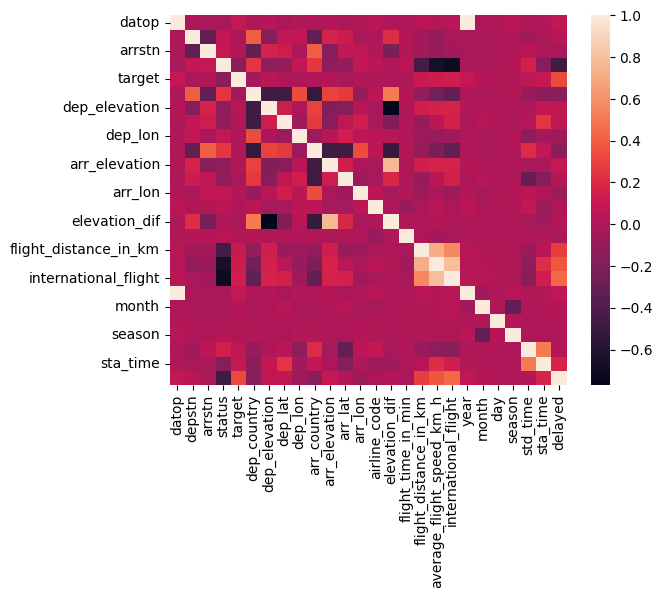

In [5]:
corr = df.corr(method='pearson')
sb.heatmap(corr)

In [43]:
# Splitting data
X = df.drop(['target','delayed'],axis=1)
y = df['delayed'] 
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=42)
# Scaling
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform (X_test)
# Decision Tree Classifier on Training Data
clf = DecisionTreeClassifier()
clf = clf.fit(X_train,y_train)
# Scores
pred_prob = clf.predict_proba(X_test)
auc_score = roc_auc_score(y_test, pred_prob[:,1],multi_class='ovr')
auc_score

0.7390379567655808

In [44]:
# Feature selection: 
# Based on the results of lasso regression, some features are dropped
lasso_df = df[[
'datop',
'depstn',
'arrstn',
'status',
'dep_country',
'arr_country',
'international_flight',
'flight_distance_in_km',
'month',
'airline_code',
'season',
'std_time',
'sta_time',
'delayed',
'target'
]]

# Splitting data
X = lasso_df.drop(['target','delayed'],axis=1)
y = lasso_df['delayed'] 
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=42)
# Scaling
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform (X_test)
# Decision Tree Classifier on Training Data
clf = DecisionTreeClassifier()
clf = clf.fit(X_train,y_train)
# Scores
pred_prob = clf.predict_proba(X_test)
auc_score = roc_auc_score(y_test, pred_prob[:,1],multi_class='ovr')
auc_score

0.7413540441506361

In [ ]:
# Feature selection improved the score from 0.720 - 0.729